# How Analytics can make you a better Video Gamer...and a better Sports GM?

*The humble copy+paste is the key to unlocking many analytical insights*

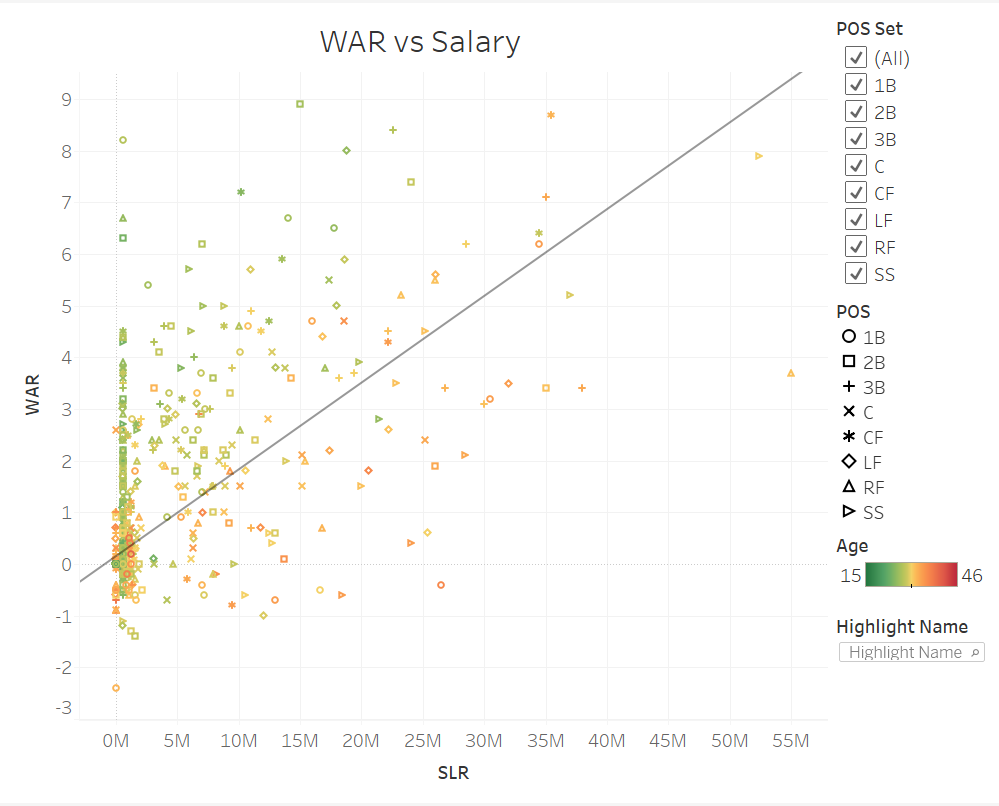

*This article will walk you through using Python, Tableau, and everyone's first keyboard shortcut to create insightful visuals*

# BREAKING: Manually Entering Data into Excel Officially a Thing of the Past

It's every information consumer's worst nightmare. Stumbling across what appears to be valuable data, conveniently structured into a paneled format, but with no means to sort the data, download it as an Excel file, or otherwise interact with it. Do you consign yourself to hours of tedium, manually recreating the table in a spreadsheet? Or do you pass up on a potential analytical opportunity? It turns out, you don't have to do either!

# The Muse

"This may not be the best way to represent data," my friend Hugh (name changed for privacy reasons) was telling me. Hugh had just finished showing me *Set with Friends*, an online game where players try to rapidly identify sets of cards based on various characteristics. While the website gave Hugh some information about each game, as well as several aggregated measures, the data was not presented in a sortable or manipulable format. If Hugh wanted to know whether or not he was improving at the game over time, those stats were not available to him. 

**Pandas** to the rescue! The Python library that is, not the martial arts phenom.

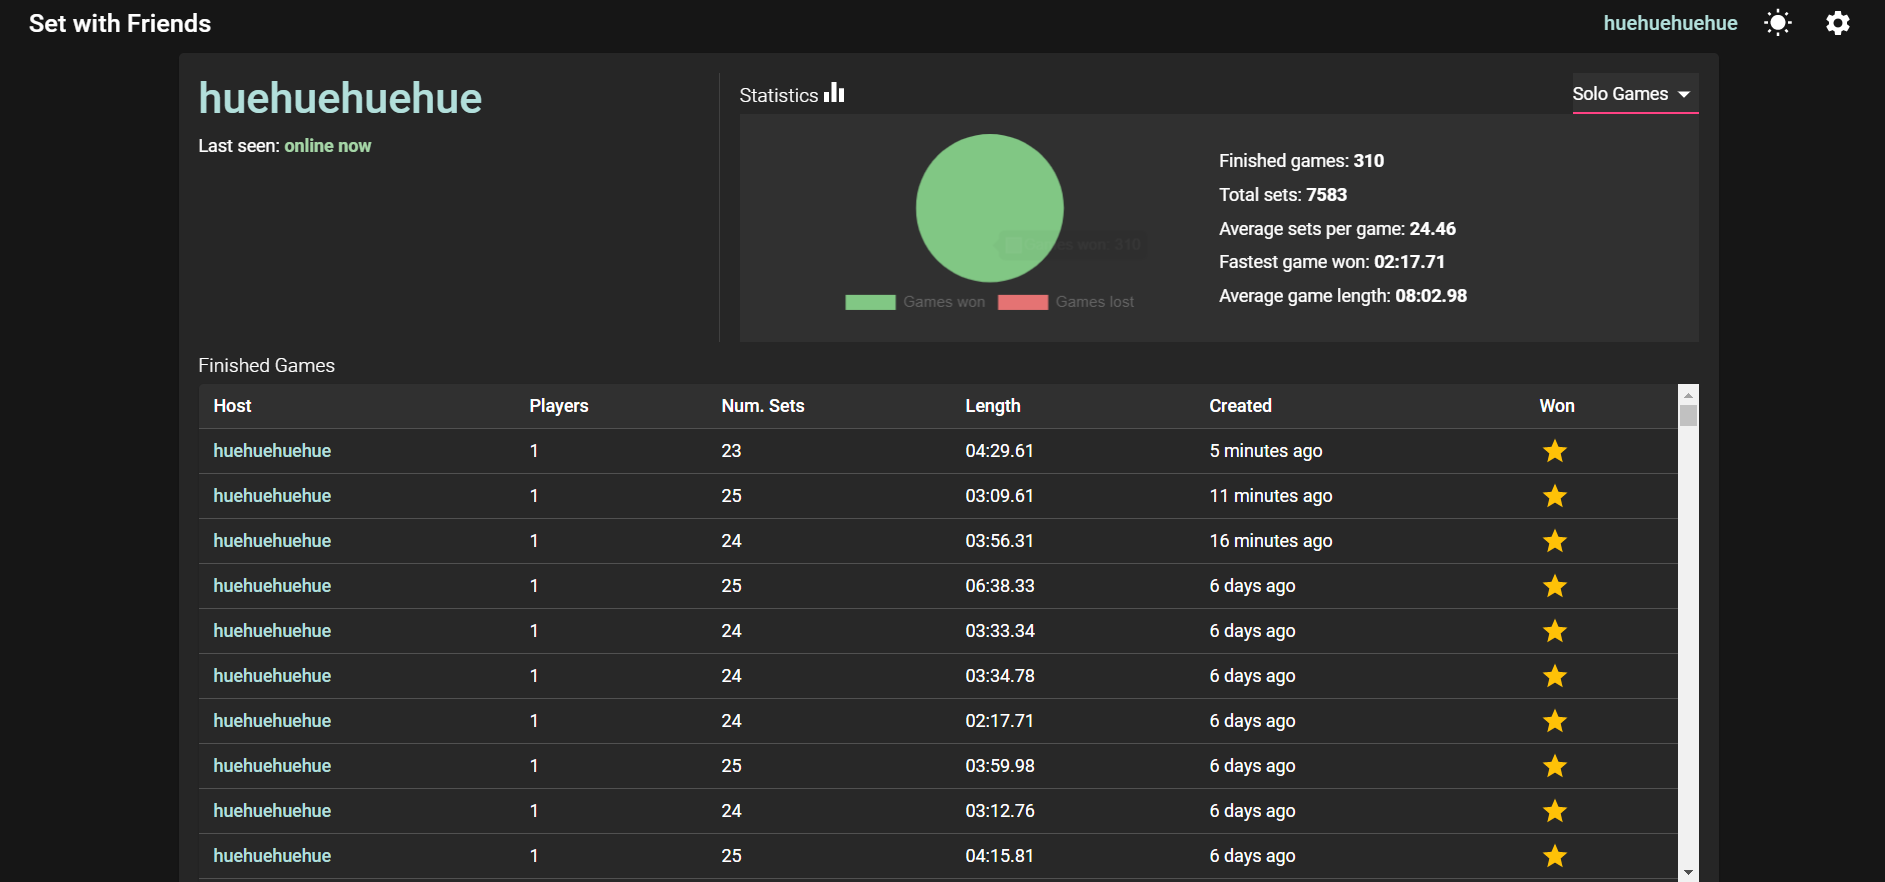

### Using pd.read_clipboard() to collect the data

Fortunately for Hugh, Python's ```pandas``` library includes the  ```pd.read_clipboard()``` function, an incredibly useful tool which allows users to create a DataFrame from virtually any structured data from a webpage, Word document, etc!

I asked Hugh to highlight, copy, and paste the table from his game interface into our Messenger chat. I then copied the chat, and used the ```pd.read_clipboard()``` function.

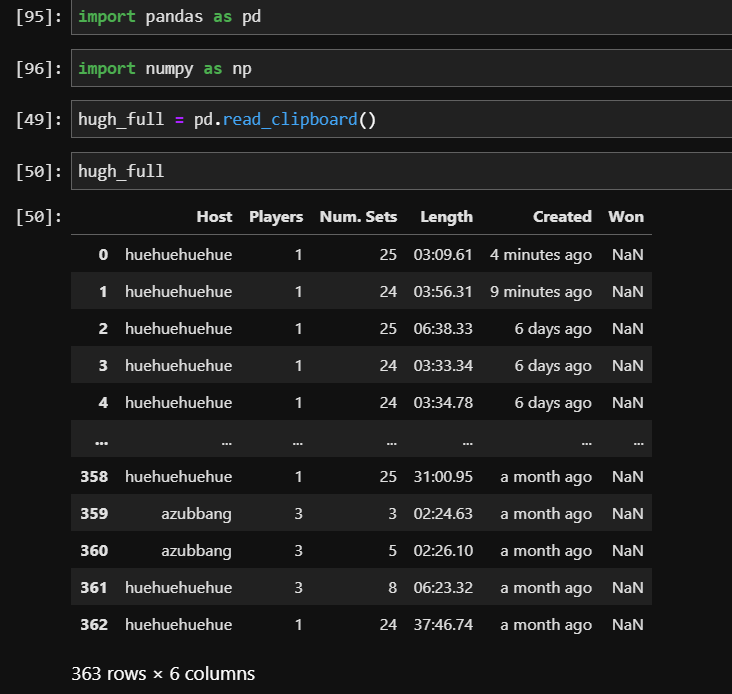

### Converting the 'Length' column to seconds

```pandas``` provides several ways with which to convert strings to dates or timestamps, but because the length of each game is not a timestamp per se, I decided to do some home cooking, creating a function which converts the length of each game to seconds.

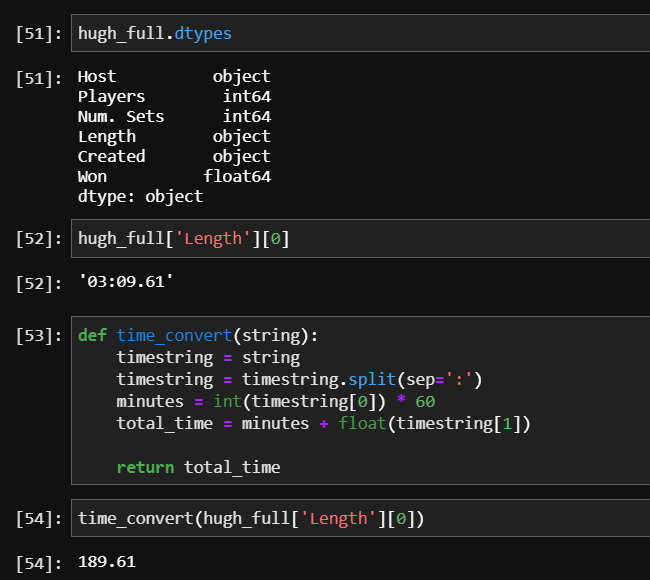

### Iterating through the entire column

Armed with the freshly homemade ```time_convert()``` function, I used a **for loop** to apply it to the entire column

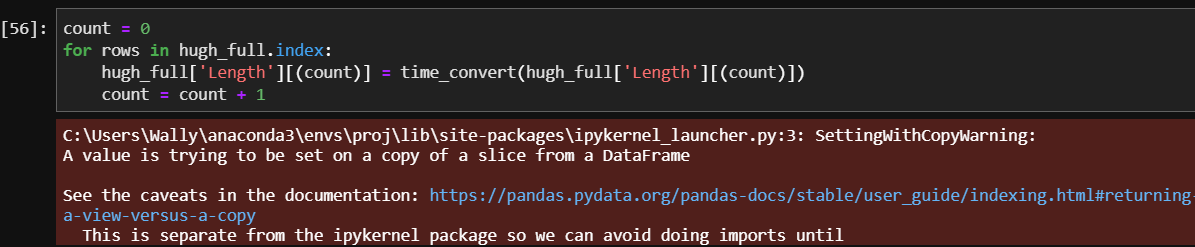

This spawned a ```SettingWithCopyWarning```, which signaled that the manipulation could be taking place on a copy of the DataFrame, instead of the DataFrame itself. Seeing the warning, I double-checked that the transformed 'Length' column was the only difference between the original DataFrame, and the one I was working in. I also confirmed that the ```time_convert()``` was behaving correctly.


### Eliminating data from other players, and creating a calculated column

My next steps were straightforward: creating a calculated column for **Seconds/Set**, and using ```numpy```'s ```np.where()``` command for filtering out data of Hugh's opponents.

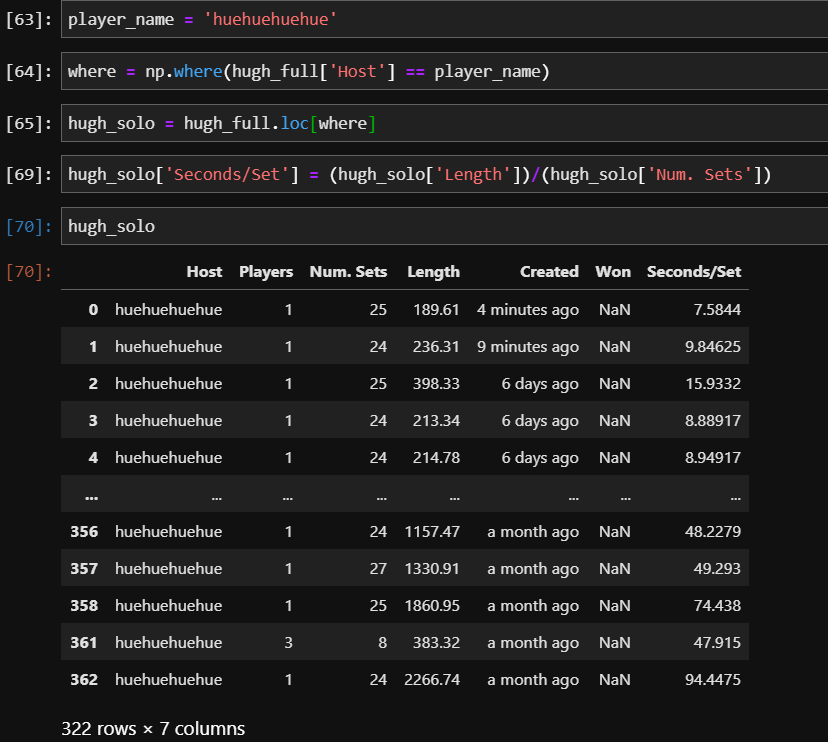

### Analysis and Visualization

I then created another column containing the 3-game Rolling Median for Seconds/Set. 

Pandas' ```.rolling``` attribute is a convenient way to perform time series analysis. I could have calculated another rolling statistic, such as mean, but chose median because it is less affected by outliers. I wanted to get a more general sense of Hugh's performance trends.

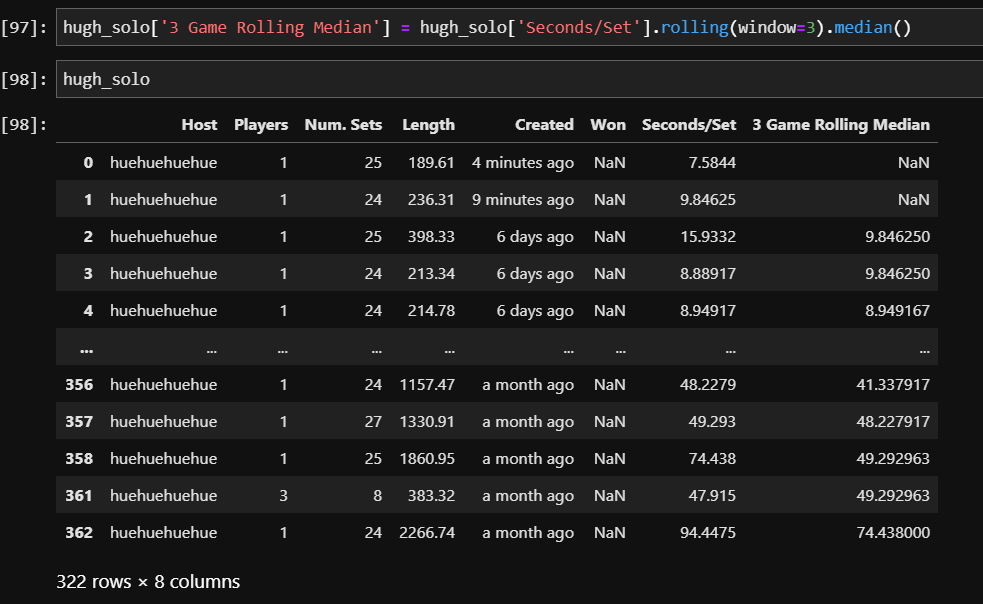

Finally, to visualize the results, I used the ```seaborn``` library, which is built off of ```matplotlib```, but requires fewer lines of code to create graphs.

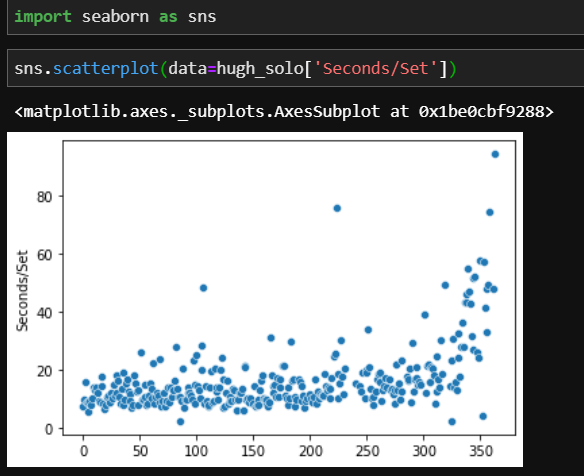
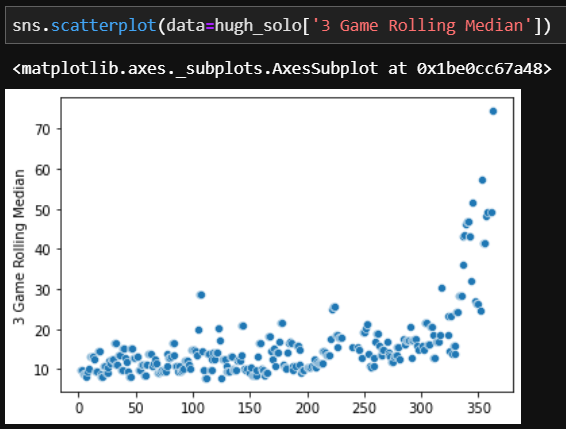

The first graph plots Seconds/Set against the DataFrame index, where the larger the index number, the less recent the game is. The second graph plots the 3-game rolling median against the same index.

The graphs show that Hugh improved drastically the first 50 or so games, but has started to plateau around 10 seconds per set. It turns out Hugh is a much, *much* better player than I am.

# Another application: Baseball Analytics!

At this point, my gears were spinning. What other problems are out there, just waiting to be solved with a simple copy+paste?

Naturally, I zeroed in on another video game. Since reading Moneyball as a 9 year old, I've always wanted to be a general manager for an MLB team. At 23, my dream has finally come true - at least in the wonderful simulation, *Out of the Park Baseball '21*. 

Having just guided the mid-market Chicago White Sox to the 2023 World Series crown, I wanted to gauge the team's spending efficiency relative to its peers. Was I the next Billy Beane, using MoneyBall 2.0 to outwit the AI Yankees of this virtual world? Or was I unsustainably buying wins at a premium?

*Out of the Park* allows users to print out ```.html``` files with tables containing information on every player in the game. A perfect candidate for the ```pd.read_clipboard()``` trick!

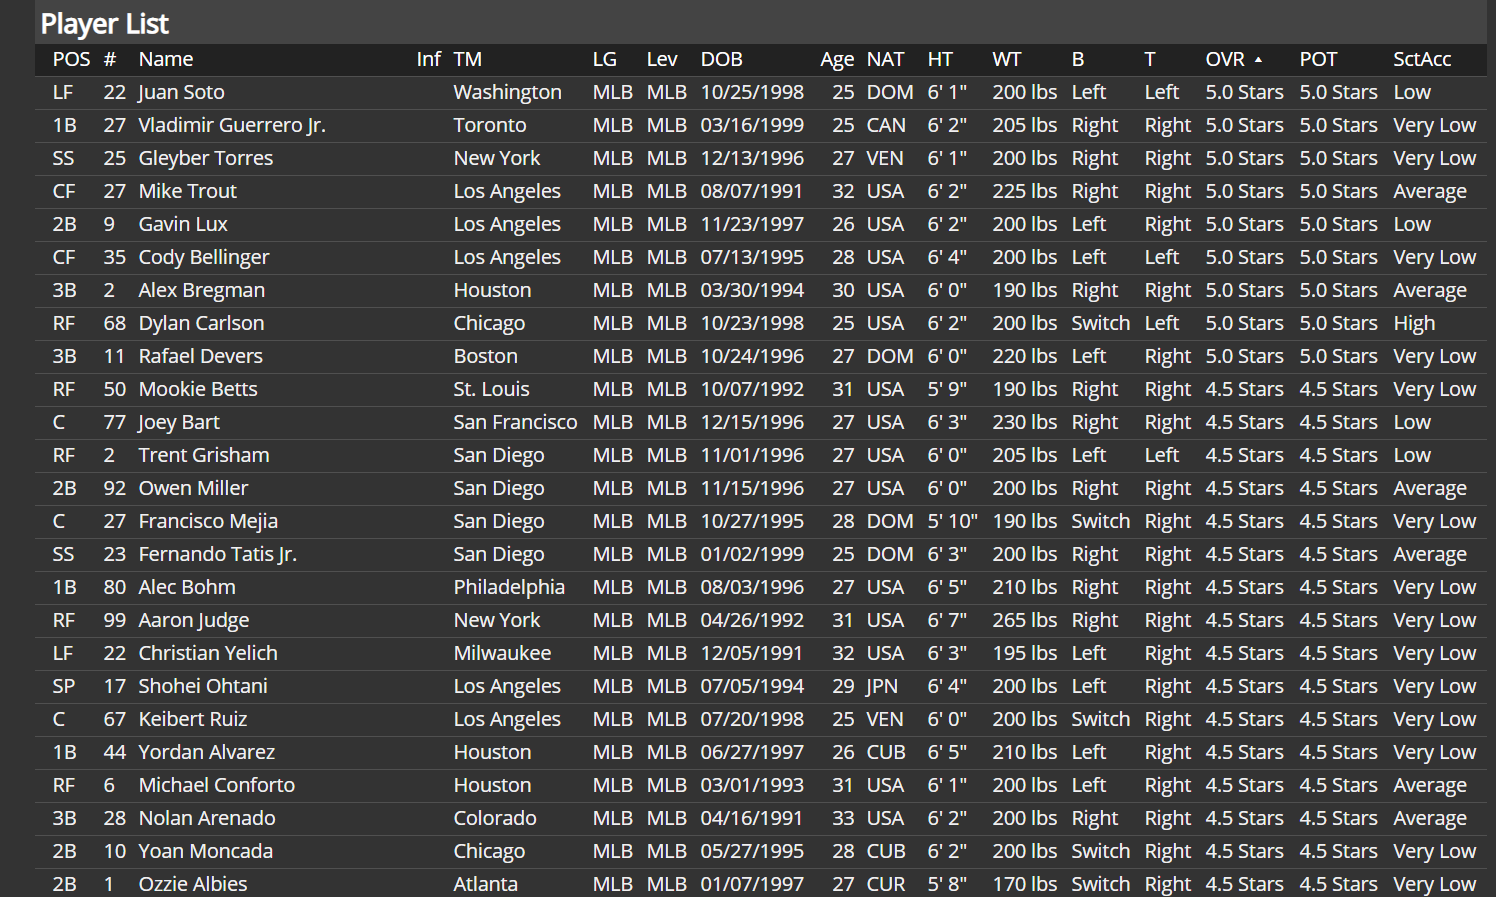

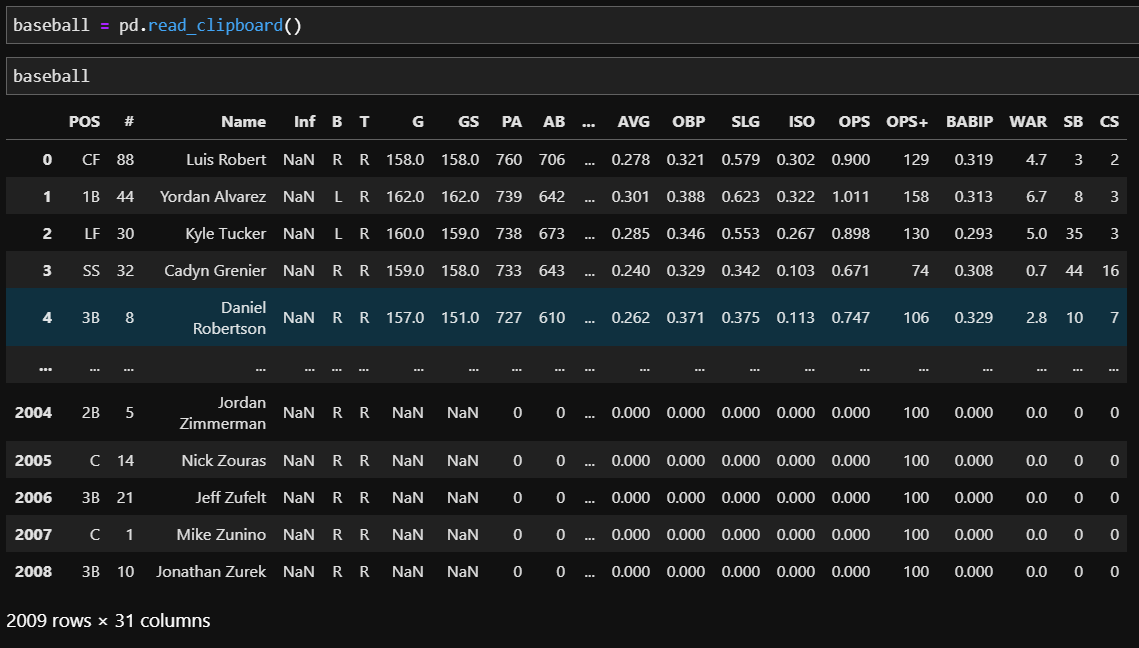

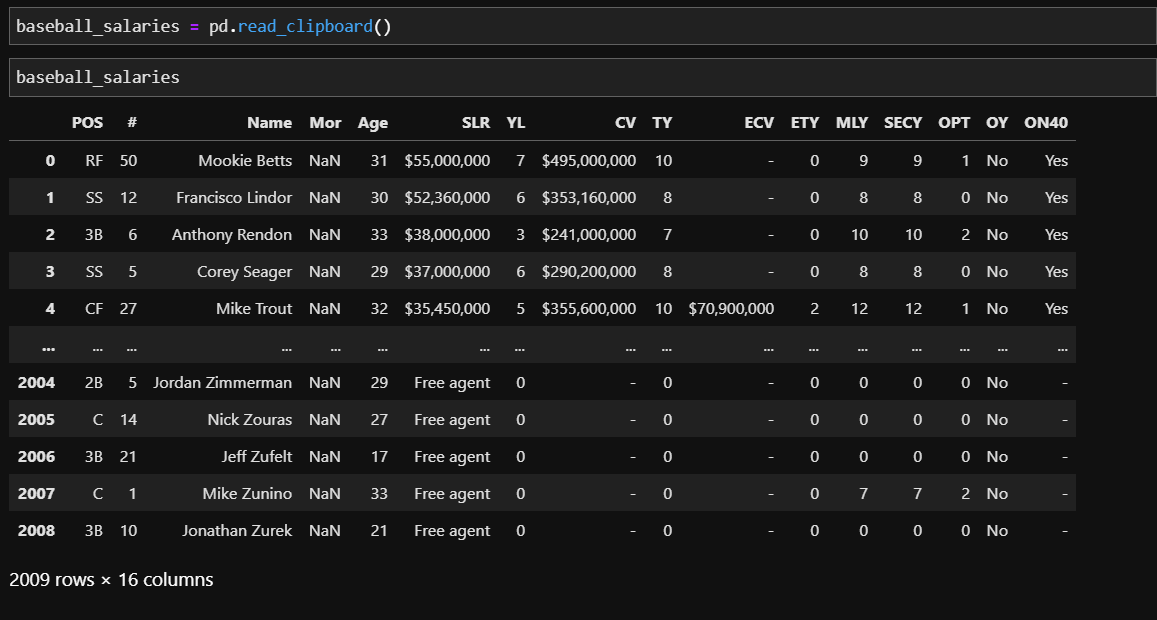

#### Cleaning the data

I printed tables containing salary, team, and performance data, reading each one into Pandas using ```pd.read_clipboard()```

The 'SLR' column, representing player salary, was read in as an object, and needed some transforming before it could be recast as an integer column.

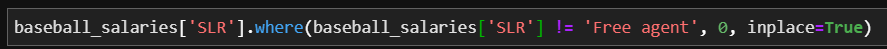
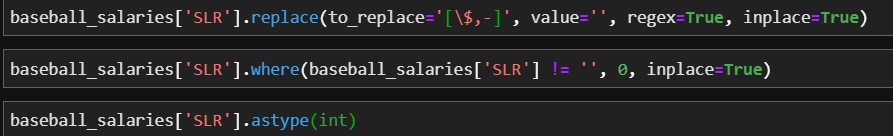

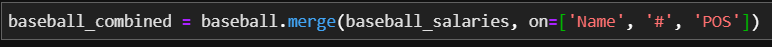

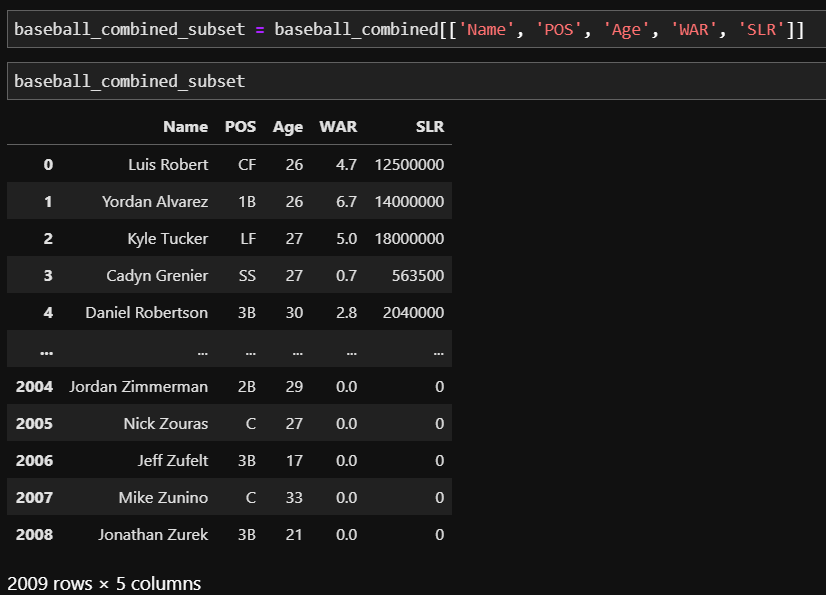

After merging and subsetting the data, it was time for analysis! (I later included team data as well).

I knew that I wanted to visualize how players' salaries compared with their production. For such a task, there is no better software than Tableau. For perspective, leading CRM company SalesForce had an in-house data visualization and insight generator that they named *Einstein AI*, and they still acquired Tableau for the latter's visualization functionality.

# Creating Tableau Visuals from the Baseball Data

Tableau's free trial lasts only 2 weeks. Fortunately, these visuals take a lot less than 2 weeks to create.

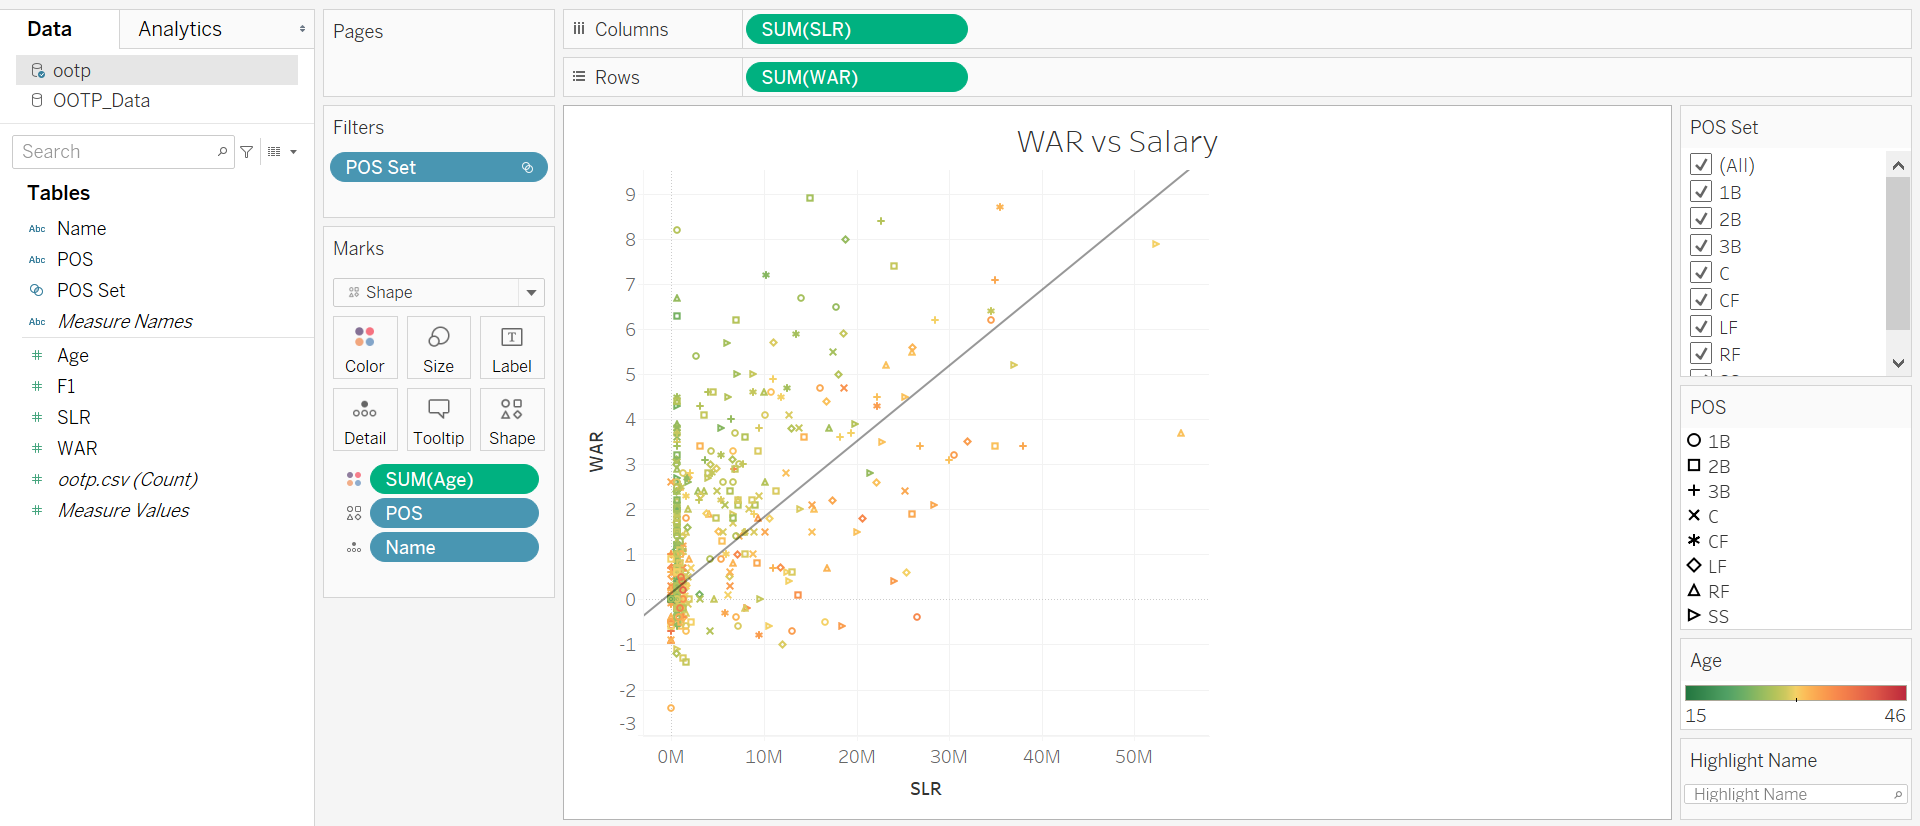

#### A brief detour as we introduce WAR

This graph plots WAR against player salary. WAR, short for Wins Above Replacement, is a metric that has proven to accurately estimate a player's offensive and defensive contributions to winning games, such that by summing up a team's WAR, you can get a pretty tight estimate of how many games they actually won.

Replacement level is defined as fringe-MLB. A team with 0 WAR would expect to win about 40 games in a 162-game season. Starting-caliber players should produce 2 WAR, All Stars will produce 5 WAR, and MVP candidates are typically around 8 WAR in a season. So a team with a full roster of players each averaging 2 WAR will win 92 or so games, and should make the playoffs. 

### Interpreting the Graph

Each mark on the graph represents a position player (non-pitcher), with the type of mark representing position, and the color of the mark representing age. The trendline is a simple linear regression using salary to model WAR. The line reflects the average price of WAR. For example, it should cost about 18 million dollars to buy (a season of) a 3 WAR player, and 29 million to buy a 5 WAR player. 

There are several insights we can draw from this graph. Right off the bat (pun intended), we can tell that the majority of players whose production does not merit their salary are older players. Because of the MLB's salary rules, players hit free agency in the middle of their primes. Teams looking to contend in the short term will outbid opponents for these players, signing them to lucrative long term contracts. Toward the end of those contracts, players will often make more than their production is worth.

Another pattern we observe is that players above 4 WAR (in the All Star conversation) are rare, and only a handful of players are genuine MVP candidates. Furthermore, of those star players, all but two of them are worth their salary. What that suggests is, for teams looking to spend more efficiently, the answer may not be to get rid of pricey but productive stars (looking at you, Chicago Cubs!!), but to jettison 1-2 WAR players who are being paid like 2-3 WAR players.

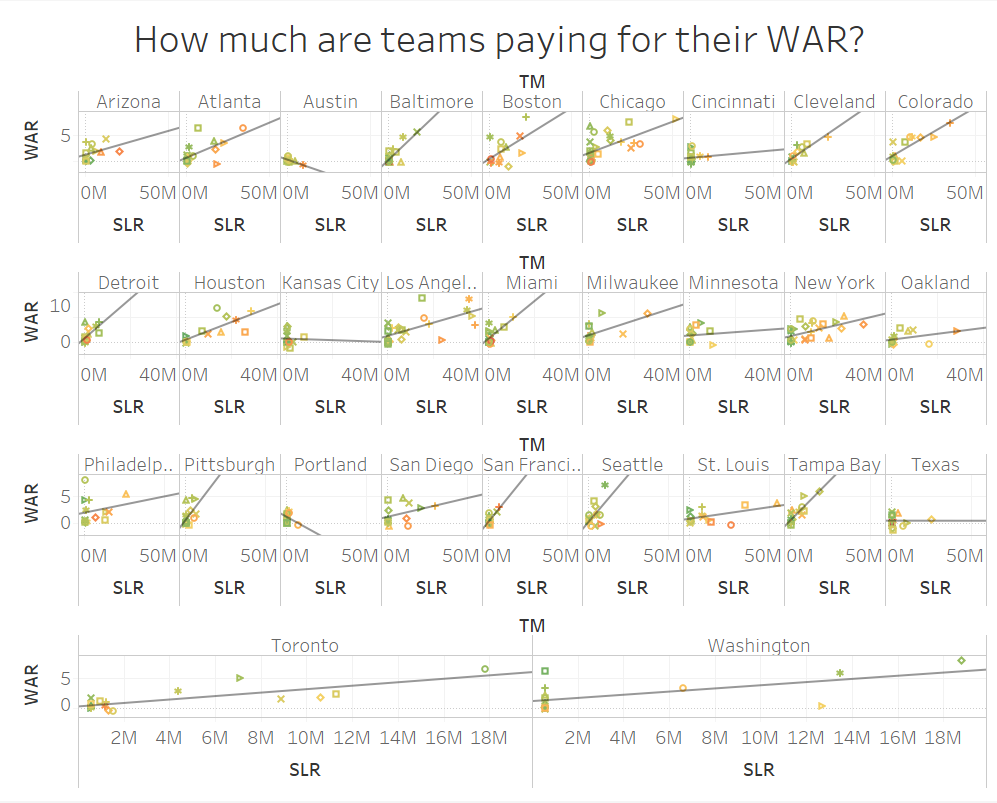

This next visualization shows the same graph broken down by team. The *Out of the Park* data printout listed each team by city, which creates the problem of cities with multiple teams having both rosters grouped together. For example, Chicago's graph includes players on both the Cubs and White Sox. 

If this were anything other than a tutorial based on data from a video game, that would warrant further action - for example, merging tables on both team and league, since a city cannot have multiple teams in the same league.

For demonstration purposes though, this visualization does have its merits. The trendlines for each team allows at-a-glance comparisons to see which teams are getting more bang for their buck. For example, small-market Tampa Bay has a young, cheap, and productive roster, which allows it to compete despite a limited payroll. However, Kansas City's inefficiency in converting dollars to wins does not bode well for its success. 

# To Recap

This article detailed the process of 
1) taking structured data that is not directly manipulable
2) reading it into a format in which it can be transformed and operated on
3) creating insightful visualizations of the data

We introduced the ```pd.read_clipboard()``` function in Python's Pandas library, which can create a DataFrame from virtually any paneled data that you are able to highlight and copy.

Then, we performed transformations in Python to prepare the data for analysis.

Finally, we performed analysis by calculating statistics in Pandas, and by leveraging the visualization functionalities of both Python and Tableau.

# What problems have you solved using pd.read_clipboard()?

To download any of the code or visualizations from this demo, head over to my [Github Repository](https://github.com/wcastelaz/Video_Game_Analytics)!